|평가문항|상세기준|
|:-|:-|
|1. 데이터의 결합하고, 데이터를 그룹화 하여 요약된 정보로 나타낼 수 있는가?|데이터 결합 및 그룹화 기법을 활용하여 요약 정보를 정확하게 나타 내었는가?|
|2. 데이터의 스케일을 변형하고, 각 스케일러의 특성을 이해하였는가?|스케일링을 효과적으로 사용하고 각 스케일러별 특성에 대해 이해 하였는가?|
|3. 원하는 만큼의 주성분을 추출하고, 기존 데이터에 대한 설명력을 제시할 수 있는가?|원하는 주성분 분석에 필요한 데이터 추출이 가능하며, 추출후에는 해당 데이터에 대해 해석이 가능한가?|

# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

# 파일 불러오기

In [2]:
brand = pd.read_csv('../data/brand.csv')
car = pd.read_csv('../data/cars.csv')

# 데이터 정보 확인

### brand 데이터

In [3]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [4]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [5]:
brand.describe()

,title,country
count,48,48
unique,48,12
top,skoda,Japan
freq,1,11


count, unique가 48인 것으로 보아 모두 다른 48개의 title 데이터가 들어있다.

### car 데이터

In [6]:
car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [8]:
car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [9]:
car.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

## 1. cars.csv와 brand.csv의 데이터 합치기  
[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.  

In [10]:
brand['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [11]:
car['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

In [12]:
# 데이터 merge를 위해 car 데이터의 unique 값들을 모두 소문자로 수정하고, 브랜드명만 추출
car['title'] = car['title'].str.lower()
car['title'] = car['title'].str.split().apply(lambda x: x[0])
car

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,audi,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,bmw,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,honda,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [13]:
used_car = car.merge(brand, on = 'title', how = 'left')
used_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom


country 컬럼이 추가되었다.

In [14]:
used_car['country'].value_counts()

Germany           863
United Kingdom    729
Japan             641
France            522
United States     439
South Korea       178
Italy             128
Czech Republic     63
Spain              60
Sweden             47
Romania            14
Malaysia            3
Name: country, dtype: int64

In [15]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 432.1+ KB


In [16]:
used_car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


# 중복값 확인 및 제거

In [17]:
# 중복값 확인
used_car[used_car.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
12,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
20,citroen,1949,114000,2013,NaN,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,NaN,France
25,vauxhall,2950,79000,2011,4.0,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
39,mercedes-benz,15900,62402,2019,1.0,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,NaN,Germany
52,vauxhall,10698,22782,2020,NaN,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,mini,11999,33156,2018,1.0,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full,United Kingdom
3663,vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN,United Kingdom
3674,mitsubishi,1489,145000,2007,NaN,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,NaN,Japan
3675,vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN,United Kingdom


In [18]:
# 중복값 제거
used_car = used_car.drop_duplicates()

In [19]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2859 non-null   object 
 1   Price              2859 non-null   int64  
 2   Mileage(miles)     2859 non-null   int64  
 3   Registration_Year  2859 non-null   int64  
 4   Previous Owners    1876 non-null   float64
 5   Fuel type          2859 non-null   object 
 6   Body type          2859 non-null   object 
 7   Engine             2842 non-null   object 
 8   Gearbox            2859 non-null   object 
 9   Doors              2834 non-null   float64
 10  Seats              2824 non-null   float64
 11  Emission Class     2800 non-null   object 
 12  Service history    446 non-null    object 
 13  country            2859 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 335.0+ KB


828개의 중복데이터가 제거되었다. (3687 - 2859)

# 결측치 탐지

In [20]:
used_car.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners       983
Fuel type               0
Body type               0
Engine                 17
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         59
Service history      2413
country                 0
dtype: int64

In [21]:
 used_car.isna().mean() * 100

title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      34.382651
Fuel type             0.000000
Body type             0.000000
Engine                0.594614
Gearbox               0.000000
Doors                 0.874432
Seats                 1.224204
Emission Class        2.063659
Service history      84.400140
country               0.000000
dtype: float64

Previous Owners, Engine, Doors, Seats, Emission Class, Service history에 결측치가 있다.  
결측치가 많은 순으로 데이터를 살펴보자.

## 1. Service history (결측치 비율 84.4%)

In [22]:
used_car['Service history'].value_counts()

Full    446
Name: Service history, dtype: int64

Full이라는 값만 포함되어 있다.  
categorical data이므로 연산을 이용해 채울 수 없고, 전부 다 삭제할 수 없으므로 'unknown'이라는 값을 지정한다.

In [23]:
# NaN값은 unknown으로 대체

used_car['Service history'] = used_car['Service history'].fillna('unknown')
used_car['Service history'].value_counts()

unknown    2413
Full        446
Name: Service history, dtype: int64

In [24]:
# 데이터가 채워졌는지 확인
used_car.isna().mean() * 100

title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      34.382651
Fuel type             0.000000
Body type             0.000000
Engine                0.594614
Gearbox               0.000000
Doors                 0.874432
Seats                 1.224204
Emission Class        2.063659
Service history       0.000000
country               0.000000
dtype: float64

## 2. Previous Owners(결측치 비율 34.4%)

In [25]:
used_car['Previous Owners'].value_counts()

2.0    533
3.0    435
1.0    355
4.0    272
5.0    171
6.0     54
7.0     39
8.0     12
9.0      5
Name: Previous Owners, dtype: int64

In [26]:
used_car['Previous Owners'].describe()

count    1876.000000
mean        2.882196
std         1.544533
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Previous Owners, dtype: float64

mean과 median 값이 큰 차이가 없으므로 결측치를 median값으로 채운다.

In [27]:
# 결측치를 median으로 채우기

used_car['Previous Owners'] = used_car['Previous Owners'].fillna(used_car['Previous Owners'].median())
used_car['Previous Owners'].value_counts()

3.0    1418
2.0     533
1.0     355
4.0     272
5.0     171
6.0      54
7.0      39
8.0      12
9.0       5
Name: Previous Owners, dtype: int64

In [28]:
# 데이터가 채워졌는지 확인
used_car.isna().mean() * 100

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.000000
Fuel type            0.000000
Body type            0.000000
Engine               0.594614
Gearbox              0.000000
Doors                0.874432
Seats                1.224204
Emission Class       2.063659
Service history      0.000000
country              0.000000
dtype: float64

# 3. Emission Class (결측치 비율 2.0%)

In [29]:
used_car[used_car['Emission Class'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
8,volvo,750,225318,2025,3.0,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,unknown,Sweden
95,renault,2490,67104,2010,1.0,Diesel,Saloon,1.5L,Manual,4.0,5.0,NaN,unknown,France
163,honda,2449,88240,2012,3.0,Petrol,MPV,2.4L,Automatic,5.0,7.0,NaN,unknown,Japan
178,mercedes-benz,3995,70000,2009,3.0,Petrol,Coupe,2.0L,Automatic,2.0,5.0,NaN,unknown,Germany
229,mercedes-benz,2995,57400,1991,3.0,Petrol,Saloon,2.6L,Automatic,4.0,NaN,NaN,unknown,Germany
237,mg,1875,75043,1972,3.0,Petrol,Convertible,1.3L,Manual,2.0,NaN,NaN,unknown,United Kingdom
513,nissan,3900,37000,2012,3.0,Petrol,MPV,2.0L,Automatic,NaN,NaN,NaN,unknown,Japan
595,vauxhall,3950,56800,2015,4.0,Diesel,Hatchback,1.7L,Manual,NaN,5.0,NaN,unknown,United Kingdom
645,rover,1650,49309,1990,4.0,Petrol,Saloon,1.0L,Automatic,2.0,NaN,NaN,unknown,United Kingdom
679,bmw,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,Germany


In [30]:
used_car['Emission Class'].value_counts()

Euro 5    1097
Euro 4     867
Euro 6     683
Euro 3     131
Euro 2      18
Euro 1       4
Name: Emission Class, dtype: int64

In [31]:
# 종류가 너무 다른 데이터가 많이 포함되어 있으므로 기준을 정하기 힘듦, drop
used_car = used_car.dropna(subset = ['Emission Class'])

In [32]:
# 데이터가 버려졌는지 확인
used_car.isna().mean() * 100

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.000000
Fuel type            0.000000
Body type            0.000000
Engine               0.035714
Gearbox              0.000000
Doors                0.000000
Seats                0.214286
Emission Class       0.000000
Service history      0.000000
country              0.000000
dtype: float64

# 4. Seats (결측치 비율 0.21%)

In [33]:
used_car[used_car['Seats'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
107,citroen,3250,126000,1995,4.0,Diesel,Hatchback,2.5L,Manual,5.0,NaN,Euro 2,unknown,France
931,bmw,6700,105000,1999,7.0,Petrol,Coupe,2.5L,Manual,2.0,NaN,Euro 2,unknown,Germany
1006,saab,5995,157000,1992,5.0,Petrol,Convertible,2.0L,Manual,2.0,NaN,Euro 1,unknown,Sweden
1053,volkswagen,1250,110000,1996,3.0,Petrol,Convertible,2.0L,Manual,2.0,NaN,Euro 1,unknown,Germany
2026,proton,3995,15760,1995,3.0,Petrol,Hatchback,1.5L,Manual,5.0,NaN,Euro 1,unknown,Malaysia
2456,vauxhall,4250,35616,2010,1.0,Diesel,Combi Van,1.3L,Manual,3.0,NaN,Euro 4,unknown,United Kingdom


In [34]:
used_car['Seats'].value_counts()

5.0    2263
4.0     414
7.0      88
2.0      24
6.0       3
3.0       2
Name: Seats, dtype: int64

In [35]:
# 데이터 수가 적긴 하지만 다른 정보들이 많이 들어있으므로 최빈값으로 채우기
used_car['Seats'] = used_car['Seats'].fillna(used_car['Seats'].mode()[0])

# 데이터 확인
used_car['Seats'].value_counts()

5.0    2269
4.0     414
7.0      88
2.0      24
6.0       3
3.0       2
Name: Seats, dtype: int64

In [36]:
# 데이터가 채워졌는지 확인
used_car.isna().mean() * 100

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.000000
Fuel type            0.000000
Body type            0.000000
Engine               0.035714
Gearbox              0.000000
Doors                0.000000
Seats                0.000000
Emission Class       0.000000
Service history      0.000000
country              0.000000
dtype: float64

# 5. Engine (결측치 비율 0.04%)

In [37]:
used_car[used_car['Engine'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
3031,vauxhall,9499,65767,2014,1.0,Petrol Plug-in Hybrid,Hatchback,NaN,Automatic,5.0,4.0,Euro 5,unknown,United Kingdom


In [38]:
used_car['Engine'].value_counts()

1.6L    538
2.0L    469
1.2L    389
1.4L    366
1.0L    205
1.5L    180
1.3L    125
1.8L    120
3.0L     77
2.2L     66
2.1L     52
1.7L     34
2.5L     31
1.9L     31
2.4L     21
1.1L     20
0.9L     14
3.5L     10
2.7L     10
3.2L      7
4.4L      5
3.7L      5
4.2L      4
5.0L      3
2.8L      3
2.3L      3
0.8L      2
2.6L      2
4.3L      2
3.1L      1
3.3L      1
5.5L      1
4.8L      1
6.3L      1
Name: Engine, dtype: int64

In [39]:
# 데이터 수가 적긴 하지만 다른 정보들이 많이 들어있으므로 최빈값으로 채우기
used_car['Engine'] = used_car['Engine'].fillna(used_car['Engine'].mode()[0])

# 데이터 확인
used_car['Engine'].value_counts()

1.6L    539
2.0L    469
1.2L    389
1.4L    366
1.0L    205
1.5L    180
1.3L    125
1.8L    120
3.0L     77
2.2L     66
2.1L     52
1.7L     34
2.5L     31
1.9L     31
2.4L     21
1.1L     20
0.9L     14
3.5L     10
2.7L     10
3.2L      7
4.4L      5
3.7L      5
4.2L      4
5.0L      3
2.8L      3
2.3L      3
0.8L      2
2.6L      2
4.3L      2
3.1L      1
3.3L      1
5.5L      1
4.8L      1
6.3L      1
Name: Engine, dtype: int64

In [40]:
# 데이터가 채워졌는지 확인
used_car.isna().mean() * 100

title                0.0
Price                0.0
Mileage(miles)       0.0
Registration_Year    0.0
Previous Owners      0.0
Fuel type            0.0
Body type            0.0
Engine               0.0
Gearbox              0.0
Doors                0.0
Seats                0.0
Emission Class       0.0
Service history      0.0
country              0.0
dtype: float64

# Numerical data의 이상치 탐지

In [41]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2800 non-null   object 
 1   Price              2800 non-null   int64  
 2   Mileage(miles)     2800 non-null   int64  
 3   Registration_Year  2800 non-null   int64  
 4   Previous Owners    2800 non-null   float64
 5   Fuel type          2800 non-null   object 
 6   Body type          2800 non-null   object 
 7   Engine             2800 non-null   object 
 8   Gearbox            2800 non-null   object 
 9   Doors              2800 non-null   float64
 10  Seats              2800 non-null   float64
 11  Emission Class     2800 non-null   object 
 12  Service history    2800 non-null   object 
 13  country            2800 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 328.1+ KB


In [42]:
used_car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,2800.00000,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000
mean,5326.27750,8.408537e+04,2011.405000,2.922857,4.324643,4.888929
std,4134.64617,3.964051e+04,4.545067,1.251985,0.982501,0.585174
min,400.00000,1.000000e+00,1992.000000,1.000000,2.000000,2.000000
25%,2449.00000,6.000000e+04,2008.000000,2.000000,3.000000,5.000000
50%,3995.00000,8.384500e+04,2011.000000,3.000000,5.000000,5.000000
75%,6995.00000,1.056650e+05,2014.000000,3.000000,5.000000,5.000000
max,33900.00000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


마일리지의 max값이 매우 크다. 확인해보자.

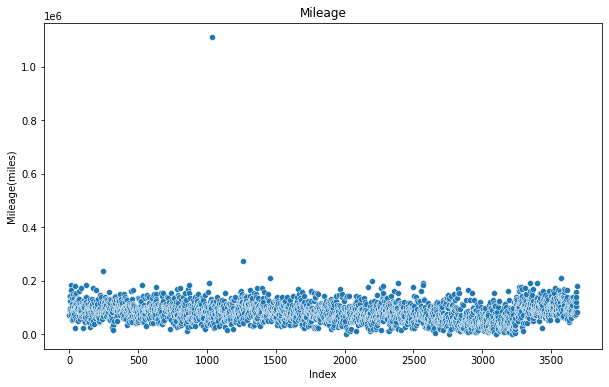

In [43]:
# Mileage(miles)'  scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=used_car.index, y=used_car['Mileage(miles)'])
plt.xlabel('Index')
plt.ylabel('Mileage(miles)')
plt.title('Mileage')
plt.show()

In [44]:
used_car.sort_values(by='Mileage(miles)', ascending=True)['Mileage(miles)'].tail(10)

2387     189988
2567     190000
3395     190000
3350     192567
2198     197790
1459     207734
3570     208000
244      234680
1259     274100
1037    1110100
Name: Mileage(miles), dtype: int64

23XXXX~ 부터 이상치로 간주.

In [45]:
# 'Mileage(miles)' 컬럼에서 2e+06 이상인 데이터 제거
used_car = used_car[used_car['Mileage(miles)'] < 2e+05]

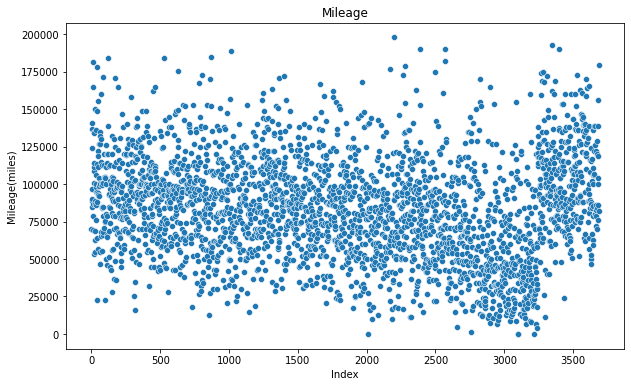

In [46]:
# Mileage(miles)'  scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=used_car.index, y=used_car['Mileage(miles)'])
plt.xlabel('Index')
plt.ylabel('Mileage(miles)')
plt.title('Mileage')
plt.show()

# 2. 카테고리형 변수를 숫자 형태로 변환하기  
[힌트] Engine, Emission Class 변수에 주목하세요!

# 원-핫 인코딩

In [47]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2795 non-null   object 
 1   Price              2795 non-null   int64  
 2   Mileage(miles)     2795 non-null   int64  
 3   Registration_Year  2795 non-null   int64  
 4   Previous Owners    2795 non-null   float64
 5   Fuel type          2795 non-null   object 
 6   Body type          2795 non-null   object 
 7   Engine             2795 non-null   object 
 8   Gearbox            2795 non-null   object 
 9   Doors              2795 non-null   float64
 10  Seats              2795 non-null   float64
 11  Emission Class     2795 non-null   object 
 12  Service history    2795 non-null   object 
 13  country            2795 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 327.5+ KB


현재 categorical data는 title, Fuel type, Body type, Engine, Gearbox, Emission Class, Service history, country가 있다.

In [48]:
# 각 컬럼의 unique 값들 확인

In [49]:
used_car['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'peugeot', 'bmw',
       'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen', 'honda',
       'mg', 'toyota', 'volvo', 'seat', 'nissan', 'alfa', 'kia', 'proton',
       'fiat', 'renault', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'subaru', 'porsche',
       'infiniti', 'abarth', 'smart', 'maserati', 'ssangyong'],
      dtype=object)

In [50]:
used_car['Fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Petrol Hybrid',
       'Diesel Hybrid'], dtype=object)

In [51]:
used_car['Body type'].unique()

array(['Hatchback', 'Coupe', 'Saloon', 'Convertible', 'Estate', 'MPV',
       'SUV', 'Combi Van', 'Pickup'], dtype=object)

In [52]:
used_car['Engine'].unique()

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '1.8L', '1.0L', '3.0L',
       '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L', '1.1L',
       '3.1L', '3.7L', '2.1L', '2.8L', '5.0L', '0.8L', '2.7L', '0.9L',
       '4.2L', '4.4L', '2.6L', '4.3L', '1.7L', '2.3L', '3.3L', '5.5L',
       '4.8L', '6.3L'], dtype=object)

In [53]:
used_car['Gearbox'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [54]:
used_car['Emission Class'].unique()

array(['Euro 6', 'Euro 4', 'Euro 5', 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

In [55]:
used_car['Service history'].unique()

array(['unknown', 'Full'], dtype=object)

In [56]:
used_car['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'France', 'Germany', 'Japan', 'Sweden', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

In [57]:
car_onehot = used_car.copy()
car_onehot = pd.get_dummies(car_onehot, columns= ['title', 'Fuel type', 'Body type', 'Engine', 'Gearbox', 'Emission Class', 'country'], drop_first = True)

In [58]:
car_onehot

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Service history,title_alfa,title_audi,title_bmw,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,5.0,5.0,unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,3.0,5.0,Full,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,949,137000,2011,3.0,5.0,5.0,unknown,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2395,96731,2010,5.0,3.0,4.0,Full,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000,85000,2013,3.0,5.0,5.0,unknown,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,5.0,5.0,unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3683,6990,119000,2012,3.0,4.0,5.0,unknown,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3684,3995,139000,2013,3.0,4.0,5.0,unknown,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3685,1390,179190,2007,3.0,5.0,5.0,Full,0,0,0,...,0,0,1,0,0,0,0,0,0,0


컬럼이 113개나 생겨버린다.  
컬럼 수를 줄이고자 'Engine'과 'Fuel type', 그리고 'country'의 분류를 재설정하겠다.

### Engine 값 재설정

In [59]:
used_car['Engine'].describe()

count     2795
unique      34
top       1.6L
freq       539
Name: Engine, dtype: object

엔진 사이즈에 따라 재분류한다.

- Very Small Engine  (0.8L - 1.0L)
- Small Engine (1.1L - 1.4L)
- Medium Engine (1.5L - 2.0L)
- Large Engine (2.1L - 3.0L)
- Very Large Engine (3.1L - 4.0L)
- High Performance/Luxury Engine (4.1L 이상)

In [60]:
# 엔진 크기에 따라 범주를 할당하는 함수
def classify_engine_size(engine_size):
    if engine_size <= 1.0:
        return 'Very Small Engine'
    elif engine_size <= 1.4:
        return 'Small Engine'
    elif engine_size <= 2.0:
        return 'Medium Engine'
    elif engine_size <= 3.0:
        return 'Large Engine'
    elif engine_size <= 4.0:
        return 'Very Large Engine'
    else:
        return 'High Performance/Luxury Engine'

engine_sizes = ['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '1.8L', '1.0L', '3.0L',
       '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L', '1.1L',
       '3.1L', '3.7L', '2.1L', '2.8L', '5.0L', '0.8L', '2.7L', '0.9L',
       '4.2L', '4.4L', '2.6L', '4.3L', '1.7L', '2.3L', '3.3L', '5.5L',
       '4.8L', '6.3L']

# 각 엔진 크기에 대해 범주를 할당하고 딕셔너리 생성
engine_size_to_category = {size: classify_engine_size(float(size.strip('L'))) for size in engine_sizes}

# used_car 데이터프레임의 'Engine' 컬럼에 딕셔너리 적용
used_car['Engine'] = used_car['Engine'].replace(engine_size_to_category)

# 적용된 분류 확인
used_car['Engine'].unique()

array(['Small Engine', 'Medium Engine', 'Very Small Engine',
       'Large Engine', 'Very Large Engine',
       'High Performance/Luxury Engine'], dtype=object)

### Fuel type 값 재설정

In [61]:
used_car['Fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Petrol Hybrid',
       'Diesel Hybrid'], dtype=object)

여기서 Petro Plug-in Hybrid를 Petrol Hybrid로 바꿀 것이다.

In [62]:
used_car['Fuel type'] = used_car['Fuel type'].replace({'Petrol Plug-in Hybrid': 'Petrol Hybrid'})
used_car['Fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol Hybrid', 'Diesel Hybrid'], dtype=object)

### Country 값 재설정

In [63]:
used_car['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'France', 'Germany', 'Japan', 'Sweden', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

country 값은 대륙별로 재분류한다.

- 유럽 (Europe): Czech Republic (체코), United Kingdom (영국), France (프랑스), Germany (독일), Sweden (스웨덴), Spain (스페인), Italy (이탈리아), Romania (루마니아)
- 아시아 (Asia): South Korea (대한민국), Malaysia (말레이시아). Japan (일본)
- 북아메리카 (North America): United States (미국)

In [64]:
# 국가를 대륙 또는 지역 이름으로 매핑하는 딕셔너리
country_to_region = {
    'Czech Republic': 'Europe',
    'Romania': 'Europe',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Sweden': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'South Korea': 'Asia',
    'Malaysia': 'Asia',
    'Japan': 'Asia',
    'United States': 'North America'
}

# country 컬럼의 값을 대응하는 대륙 또는 지역 이름으로 대체
used_car['country'] = used_car['country'].replace(country_to_region)
used_car['country'].unique()

array(['Europe', 'Asia', 'North America'], dtype=object)

## 다시 원-핫 인코딩

In [65]:
# 다시 원-핫 인코딩을 수행
car_onehot = used_car.copy()
car_onehot = pd.get_dummies(car_onehot, columns= ['title', 'Fuel type', 'Body type', 'Engine', 'Gearbox', 'Emission Class', 'Service history', 'country'], drop_first = True)
car_onehot

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,title_alfa,title_audi,title_bmw,title_chevrolet,...,Engine_Very Small Engine,Gearbox_Manual,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Service history_unknown,country_Europe,country_North America
0,6900,70189,2016,3.0,5.0,5.0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
1,1495,88585,2008,4.0,3.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,949,137000,2011,3.0,5.0,5.0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,2395,96731,2010,5.0,3.0,4.0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1000,85000,2013,3.0,5.0,5.0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,5.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3683,6990,119000,2012,3.0,4.0,5.0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
3684,3995,139000,2013,3.0,4.0,5.0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
3685,1390,179190,2007,3.0,5.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


컬럼수가 75개로 줄었다!

In [66]:
car_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 0 to 3686
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     2795 non-null   int64  
 1   Mileage(miles)            2795 non-null   int64  
 2   Registration_Year         2795 non-null   int64  
 3   Previous Owners           2795 non-null   float64
 4   Doors                     2795 non-null   float64
 5   Seats                     2795 non-null   float64
 6   title_alfa                2795 non-null   uint8  
 7   title_audi                2795 non-null   uint8  
 8   title_bmw                 2795 non-null   uint8  
 9   title_chevrolet           2795 non-null   uint8  
 10  title_chrysler            2795 non-null   uint8  
 11  title_citroen             2795 non-null   uint8  
 12  title_dacia               2795 non-null   uint8  
 13  title_daewoo              2795 non-null   uint8  
 14  title_da

### 데이터 타입 확인

In [67]:
car_onehot['Engine_Small Engine']

0       1
1       1
2       1
3       1
4       1
       ..
3682    0
3683    0
3684    0
3685    0
3686    1
Name: Engine_Small Engine, Length: 2795, dtype: uint8

Engine_* 데이터들의 데이터타입이 uint8으로 변경되었다.

In [68]:
car_onehot['Emission Class_Euro 6']

0       1
1       0
2       0
3       0
4       0
       ..
3682    0
3683    0
3684    0
3685    0
3686    0
Name: Emission Class_Euro 6, Length: 2795, dtype: uint8

Emission Class_* 데이터들의 데이터타입이 uint8으로 변경되었다.

# 스케일링 (Scaling)

마일리지의 범위가 매우 크므로, MinMax scaling을 사용해볼 것이다.

In [69]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# pd.DataFrame(mm.fit_transform(car_onehot), columns = car_onehot.columns)

# 위에 원핫 인코딩을 할 때 'Service history'를 빼먹어서 여기서 에러 발생함. 'Service history'도 원핫 인코딩에 추가하여 해결.

In [70]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
pd.DataFrame(mm.fit_transform(car_onehot), columns = car_onehot.columns)

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,title_alfa,title_audi,title_bmw,title_chevrolet,...,Engine_Very Small Engine,Gearbox_Manual,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Service history_unknown,country_Europe,country_North America
0,0.194030,0.354863,0.774194,0.250,1.000000,0.6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.032687,0.447871,0.516129,0.375,0.333333,0.6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.016388,0.692652,0.612903,0.250,1.000000,0.6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.059552,0.489057,0.580645,0.500,0.333333,0.4,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.017910,0.429746,0.677419,0.250,1.000000,0.6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,0.029701,0.385264,0.451613,0.375,1.000000,0.6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2791,0.196716,0.601646,0.645161,0.250,0.666667,0.6,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2792,0.107313,0.702764,0.677419,0.250,0.666667,0.6,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2793,0.029552,0.905960,0.483871,0.250,1.000000,0.6,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# PCA 분석  
기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [71]:
pca = PCA(5)
pd.DataFrame(pca.fit_transform(car_onehot), columns = ['PC1','PC2','PC3','PC4','PC5'])

,PC1,PC2,PC3,PC4,PC5
0,-13391.766213,716.251257,-3.315129,0.378380,-0.481135
1,5311.448654,-3504.725893,0.487557,0.958031,0.839255
2,53662.735802,-962.410798,-3.605678,-0.385101,-0.294298
3,13383.481933,-2087.123437,-0.734366,2.207012,1.006523
4,1765.307984,-4227.313155,-5.120250,-0.001868,-0.400232
...,...,...,...,...,...
2790,-7039.974253,-4394.130580,2.427764,0.239968,-1.107710
2791,35314.160700,3918.517257,0.445434,0.200794,0.450598
2792,55464.436241,2204.921868,-3.051520,0.172684,0.601970
2793,95738.755359,2167.950295,0.500004,-0.971278,-0.387077


In [72]:
(pca.explained_variance_ratio_).sum()

0.999999997098419

In [73]:
pca = PCA(2)
pd.DataFrame(pca.fit_transform(car_onehot), columns = ['PC1','PC2'])

,PC1,PC2
0,-13391.766213,716.251257
1,5311.448654,-3504.725893
2,53662.735802,-962.410798
3,13383.481933,-2087.123437
4,1765.307984,-4227.313155
...,...,...
2790,-7039.974253,-4394.130580
2791,35314.160700,3918.517257
2792,55464.436241,2204.921868
2793,95738.755359,2167.950295


In [74]:
(pca.explained_variance_ratio_).sum()

0.9999999870583035

PCA=2만 되어도 99%의 정보를 갖는다.

# 상관관계가 높은 변수들은?

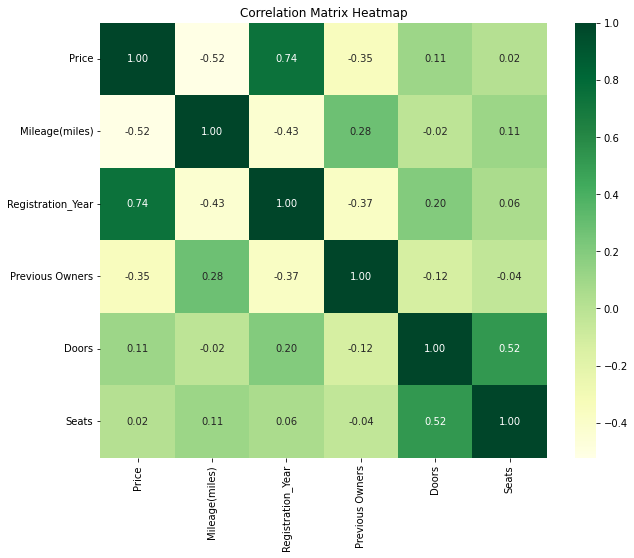

In [75]:
#상관계수 매트릭스 계산
corr_matrix = used_car.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGn')
plt.title('Correlation Matrix Heatmap')
plt.show()

Registration_Year와 Price의 상관계수가 0.74로 가장 높고, 그 다음으로 Doors와 Seats의 상관계수가 0.52로 높다.


## Registration_Year vs. Price

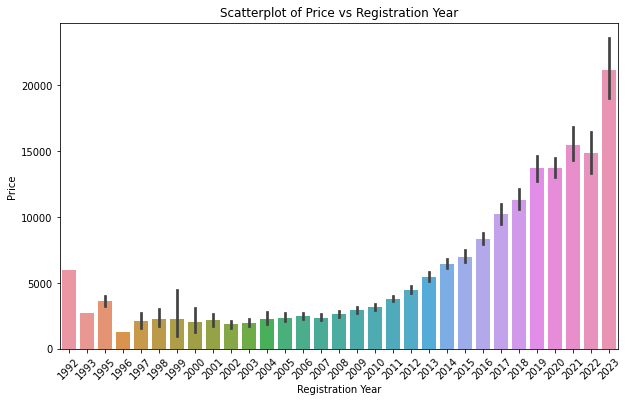

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Registration_Year', y='Price', data=used_car)
plt.xlabel('Registration Year')
plt.ylabel('Price')
plt.title('Scatterplot of Price vs Registration Year')
plt.xticks(rotation=45)
plt.show()

대체적으로 가격과 registration year는 관계가 있다. 최근 등록한 중고차일수록 가격이 저렴하다.  
1990년대 초반 차량은 클래식 차량에 프리미엄이 붙은 것으로 생각할 수도 있을 듯.

## Doors vs. Seats

In [80]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2795 non-null   object 
 1   Price              2795 non-null   int64  
 2   Mileage(miles)     2795 non-null   int64  
 3   Registration_Year  2795 non-null   int64  
 4   Previous Owners    2795 non-null   float64
 5   Fuel type          2795 non-null   object 
 6   Body type          2795 non-null   object 
 7   Engine             2795 non-null   object 
 8   Gearbox            2795 non-null   object 
 9   Doors              2795 non-null   float64
 10  Seats              2795 non-null   float64
 11  Emission Class     2795 non-null   object 
 12  Service history    2795 non-null   object 
 13  country            2795 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 392.1+ KB


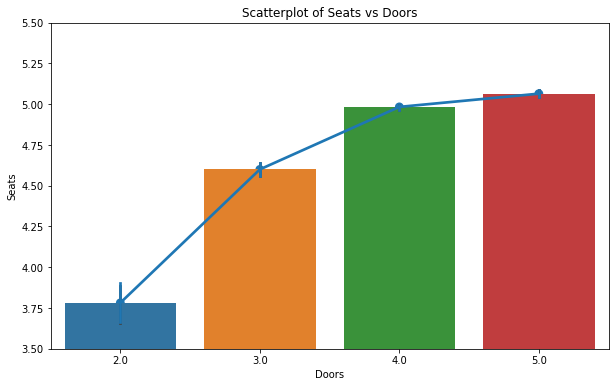

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Doors', y='Seats', data=used_car)
sns.pointplot(x='Doors', y='Seats', data=used_car)
plt.xlabel('Doors')
plt.ylabel('Seats')
plt.title('Scatterplot of Seats vs Doors')
plt.ylim(3.5, 5.5)
plt.show()

다소 직관적으로 예측할 수 있는 것이긴 하나 의자 수와 문의 개수는 비례관계이다.

# 국가별 총 브랜드 개수는?  

In [93]:
# 국가별로 그룹화하고, 각 그룹 내에서 브랜드의 고유 개수 세기
brand_counts_per_country = used_car.groupby('country')['title'].nunique()

print(brand_counts_per_country)

country
Asia             15
Europe           25
North America     5
Name: title, dtype: int64


# 회고

뭔가 슬슬 감이 잡히는 듯 아닌 듯 아리송하네요. 아직도 결측치나 outlier 처리할 때는 어떤 걸 기준으로 삼아야 할 지 조금 헷갈리는 것 같습니다.  
저는 Emission unit을 결측치에서 인사이트를 얻지 못해서 그냥 drop해 버렸는데 다른 방법으로 처리하신 분들이 계실 지 궁금합니다. 다른 방법으로 처리하셨다면 왜 그렇게 하셨는지도 궁금해요!

이제 결측치 처리에는 나름 익숙해지고 있는 것 같습니다. 아직은 어느정도 정제된 데이터를 다루니 그래도 괜찮은 것 같은데 나중에 비정제 데이터가 되면 얼마나 복잡할지 가늠이 되질 않네요😂  

그래도 여러 단계도 여러 번 거치다 보면 체득이 될 것이라고 믿습니다.  
처음에는 깃허브, 깃에 올리는 것조차 힘들었지만 지금은 쉬워진 것처럼요!  
매번 연습할 수 있는 좋은 기회를 주셔서 감사드립니다.